In [6]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier     #随机森林用于分类
from sklearn.ensemble import RandomForestRegressor       #随机森林用于回归
from sklearn.model_selection import train_test_split           #划分训练集与测试集
from sklearn import metrics    
from sklearn.metrics import r2_score              #用于模型拟合优度评估
import numpy as np 
import pandas as pd           #读取数据
from openpyxl import load_workbook

import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号


In [7]:
# df_2=pd.read_excel("data.xlsx",encoding="gbk")


# # 读取Excel文件
# wb = load_workbook(r"C:\Users\21550\Desktop\数据\data_mouth1.xlsx")
# sheet = wb.active
# data = sheet.values
 
# # 将数据转换为DataFrame
# df_2 = pd.DataFrame(data)
# # # 删除包含NaN值的行
# # df = df.dropna()


df_2=pd.read_csv(r"C:\Users\21550\Desktop\数据\data_year12.csv", header=0,encoding="utf-8")
# df_2=pd.read_csv(r"C:\Users\21550\Desktop\数据\data_mouth_final4.csv", header=0,encoding="utf-8")
# df_2=pd.read_csv(r"C:\Users\21550\Desktop\数据\副本第一题-降维后y7.csv", header=0,encoding="utf-8")
# 填充NaN值
# df = df.fillna(0)  # 填充为指定值
df_2 = df_2.fillna(df_2.mean())  # 使用均值填充
df_2.head()

,FAC1_1,year,x1,x2,x3,x4,x5,x6,x7,x8,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,-0.13314,2018,1.792095e+07,12.630014,751075.0652,10.381276,559.325833,1.381579e+10,62.455833,12.502609,...,330000,9603,248,1552,219,9875.745833,9858.183333,13.89,0.1606,8063
1,-0.00834,2019,8.675568e+06,-5.802405,316733.9224,80.777290,746.027500,1.594511e+10,74.044167,12.192790,...,510000,4649,244,1160,235,9457.894444,9241.994444,14.28,0.1628,8034
2,0.14207,2020,7.649988e+06,-4.231486,313865.2993,3.235067,1751.653333,2.039163e+10,162.429167,16.049302,...,800000,3866,246,1376,199,7626.162500,8079.908333,14.69,0.1724,7646
3,-0.65993,2014,5.678417e+06,38.489032,362657.3535,36.274042,1543.523333,5.493843e+09,141.817500,5.670827,...,23000,2278,95,582,236,9828.166667,10425.625000,10.48,0.1313,10525
4,-0.61505,2015,8.851955e+06,50.049453,596463.4841,54.080297,1746.226667,5.447269e+09,190.396667,3.833006,...,50000,3104,134,1044,277,7979.083333,8463.875000,11.23,0.1469,10170


In [8]:
#将数据分为训练和测试集
train_labels = df_2.iloc[:,0]          #数据标签
train_features= df_2.iloc[:,1:]        #数据特征
feature_list = list(train_features.columns)        #数据特征名称
train_features = np.array(train_features)            #格式转换
#划分训练集与测试集
train_features, test_features, train_labels, test_labels = train_test_split(train_features, train_labels, test_size = 0.25, random_state = 42)

In [9]:
#构造随机森林模型
rf=RandomForestClassifier(n_estimators = 1000,oob_score = True,n_jobs = -1,random_state =42,max_features='auto',min_samples_leaf = 12)
rf.fit(train_features,train_labels)               #模型拟合
predictions= rf.predict(test_features)                 #预测
print("train r2:%.3f"%r2_score(train_labels,rf.predict(train_features)))         #评估
print("test r2:%.3f"%r2_score(test_labels,predictions))

d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.model_selection import GridSearchCV
#GridSearch网格搜索 进行参数调优
rfc=RandomForestClassifier()
param = {"n_estimators": range(1,20),"min_samples_leaf": range(1,20)}     #要调优的参数
gs = GridSearchCV(estimator=rfc,param_grid=param,cv=5)
gs.fit(train_features,train_labels)                  #调优拟合

d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\skle

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': range(1, 20),
                         'n_estimators': range(1, 20)})

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

# # 执行一次
# # os.environ['PATH'] = os.environ['PATH']+';'+r"D:\CLibrary\Graphviz2.44.1\bin\graphviz"
# dot_data = StringIO()
# export_graphviz(pipe.named_steps['regressor'].estimators_[0],
#                 out_file=dot_data)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')
# Image(graph.create_png())

In [ ]:
#导出调参后最优参数
best_score=gs.best_score_
best_params=gs.best_params_
print(best_score,best_params,end='\n')

0.9998571496638873 {'min_samples_leaf': 1, 'n_estimators': 14}


In [ ]:
#最优参数再次进行模型评估
rf=RandomForestRegressor(n_estimators = 16,oob_score = True,n_jobs = -1,random_state =42,max_features='auto',min_samples_leaf = 1)
rf.fit(train_features,train_labels)
predictions= rf.predict(test_features)

# # 执行一次
# # os.environ['PATH'] = os.environ['PATH']+';'+r"D:\CLibrary\Graphviz2.44.1\bin\graphviz"
# dot_data = StringIO()
# export_graphviz(rf)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')
# Image(graph.create_png())

print("train r2:%.3f"%r2_score(train_labels,rf.predict(train_features)))
print("test r2:%.3f"%r2_score(test_labels,predictions))    

train r2:1.000
test r2:1.000


d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\software_bag_X\py_place\PyCharm Community Edition 2022.3.2\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegre

In [ ]:
importances = list(rf.feature_importances_)      #辛烷值RON影响因素的重要性
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list,importances)]     #将相关变量名称与重要性对应
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)                #排序
[print('Variable: {:12} Importance: {}'.format(*pair)) for pair in feature_importances]            #输出特征影响程度详细数据

Variable: x25          Importance: 0.16
Variable: x14          Importance: 0.12
Variable: x16          Importance: 0.11
Variable: x6           Importance: 0.1
Variable: x20          Importance: 0.09
Variable: x11          Importance: 0.06
Variable: x13          Importance: 0.06
Variable: x10          Importance: 0.05
Variable: x19          Importance: 0.05
Variable: x24          Importance: 0.05
Variable: x12          Importance: 0.04
Variable: x18          Importance: 0.03
Variable: x17          Importance: 0.02
Variable: x23          Importance: 0.02
Variable: year         Importance: 0.01
Variable: x3           Importance: 0.01
Variable: x4           Importance: 0.01
Variable: x15          Importance: 0.01
Variable: x21          Importance: 0.01
Variable: x1           Importance: 0.0
Variable: x2           Importance: 0.0
Variable: x5           Importance: 0.0
Variable: x7           Importance: 0.0
Variable: x8           Importance: 0.0
Variable: x9           Importance: 0.0
Variabl

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

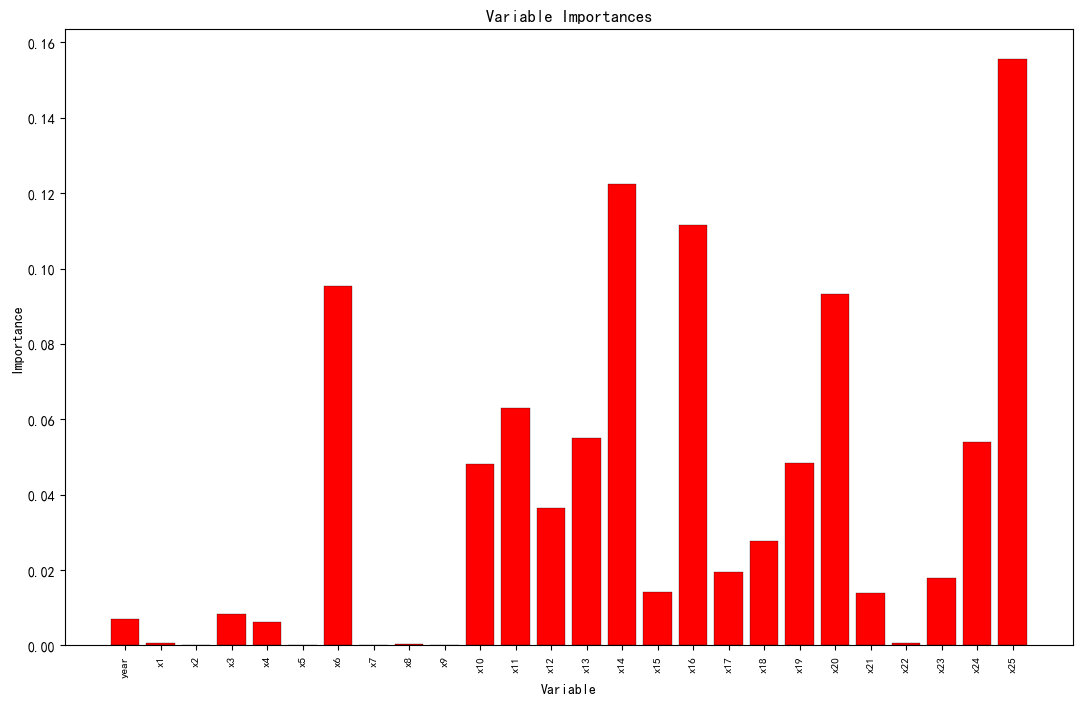

In [ ]:
#绘图
f,ax = plt.subplots(figsize = (13,8))    #设置图片大小
x_values = list(range(len(importances)))     
plt.bar(x_values,importances, orientation = 'vertical', color = 'r',edgecolor = 'k',linewidth =0.2)    #绘制柱形图
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical',fontsize=8)      
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
# 以二维表格形式显示
importances_df = pd.DataFrame()
importances_df["特征名称"]=feature_list
importances_df["特征重要性"]=importances
p=importances_df.sort_values("特征重要性",ascending=False)
print(importances_df)

    特征名称     特征重要性
0   year  0.006920
1     x1  0.000744
2     x2  0.000023
3     x3  0.008374
4     x4  0.006132
5     x5  0.000000
6     x6  0.095284
7     x7  0.000114
8     x8  0.000333
9     x9  0.000078
10   x10  0.048056
11   x11  0.063101
12   x12  0.036532
13   x13  0.055091
14   x14  0.122478
15   x15  0.014256
16   x16  0.111505
17   x17  0.019624
18   x18  0.027812
19   x19  0.048443
20   x20  0.093238
21   x21  0.013849
22   x22  0.000630
23   x23  0.017885
24   x24  0.053856
25   x25  0.155643


In [ ]:
lost_result=list(p['特征名称'][:10])                        #数据排名前15个的特征
u=df_2.loc[:,lost_result]
print(u)

      x25    x14      x16            x6  x20          x11        x13     x24  \
0    8063   6500   330000  1.381579e+10  219  10824535670  14.210000  0.1606   
1    8034  20000   510000  1.594511e+10  235  13031435401  14.551667  0.1628   
2    7646  13000   800000  2.039163e+10  199  15941002496  15.395000  0.1724   
3   10525   1500    23000  5.493843e+09  236   5475406932  14.347500  0.1313   
4   10170   3300    50000  5.447269e+09  277   6486308685  14.070000  0.1469   
..    ...    ...      ...           ...  ...          ...        ...     ...   
89  10525   1500    23000  5.493843e+09  236   5475406932  14.347500  0.1313   
90  10170   3300    50000  5.447269e+09  277   6486308685  14.070000  0.1469   
91   9849   2700   140000  7.867538e+09  226   6567863324  13.210833  0.1471   
92   7646  13000   800000  2.039163e+10  199  15941002496  15.395000  0.1724   
93   7040  22000  2610000  2.428003e+10  164  28428267275  16.397500  0.1786   

     x19         x10  
0   1552  129270

In [ ]:
u.to_excel("最终提取数据变量final.xlsx",header=True,index=False)

In [ ]:
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn import tree
import pydotplus

Estimators = rfc.estimators_
for index, model in enumerate(Estimators):
    filename = 'Tree' + str(index) + '.pdf'
    dot_data = tree.export_graphviz(model , out_file=None,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf(filename)


AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'